In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [26]:


data = pd.read_csv('Preparados.csv')



 Fue definido como caso aquel paciente que fue sometido a biopsia prostática y que en un periodo máximo de 30 días posteriores al procedimiento presentó fiebre, infección urinaria o sepsis; requiriendo manejo médico ambulatorio u hospitalizado para la resolución de la complicación y como control al paciente que fue sometido a biopsia prostática y que no presentó complicaciones infecciosas en el período de 30 días posteriores al procedimiento.

In [27]:
data.drop(columns=['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','PSA','FIEBRE'],inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 34 columns):
 #   Column                                                                                                 Non-Null Count  Dtype
---  ------                                                                                                 --------------  -----
 0   EDAD                                                                                                   562 non-null    int64
 1   DIABETES                                                                                               562 non-null    int64
 2   VOLUMEN PROSTATICO                                                                                     562 non-null    int64
 3   CUP                                                                                                    562 non-null    int64
 4   ENF. CRONICA PULMONAR OBSTRUCTIVA                                                                      562 non

In [29]:
y = data["HOSPITALIZACION"] # declaramos la columna etiqueta

# Elimina la columna del DataFrame original

data.drop(columns=["HOSPITALIZACION"], inplace=True)

# asignamos a X los valores restantes para entrenar

X = data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [31]:
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [32]:
tree = clf.fit(X_train,y_train)
tree

DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
evaluacion = tree.predict(X_test)
    
score = accuracy_score(evaluacion,y_test)

score

0.9763313609467456

In [18]:
from sklearn.metrics import  classification_report
print(classification_report(evaluacion, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       164
           1       0.56      1.00      0.71         5

    accuracy                           0.98       169
   macro avg       0.78      0.99      0.85       169
weighted avg       0.99      0.98      0.98       169



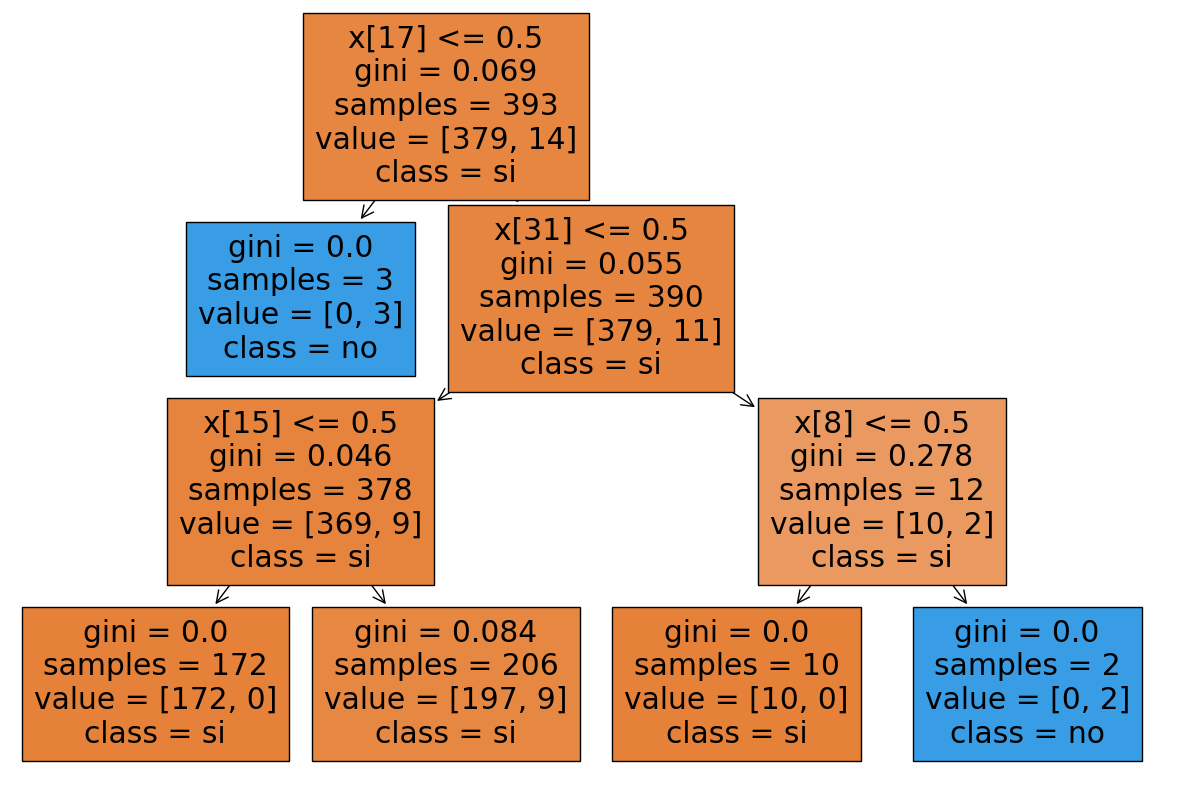

In [34]:
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según tus preferencias
from sklearn.tree import plot_tree
plot_tree(clf, filled=True, feature_names=None, class_names=['si','no'])  # Puedes proporcionar nombres de características y clases si es necesario
plt.show()

In [35]:
param_grid = {
    'max_depth':range(20),
    'min_samples_leaf' : range(5),
    'min_samples_split' : range(2,10),
    'criterion':['gini','entropy'],
    'max_features':[None,'sqrt','log2']
}

In [37]:
grid_search = GridSearchCV(tree,param_grid, cv=6, scoring='accuracy')

In [38]:
grid_search.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
6912 fits failed out of a total of 28800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/pytho

GridSearchCV(cv=6,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 20),
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': range(0, 5),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

In [40]:
mejor_parametro = grid_search.best_estimator_
print(mejor_parametro)

DecisionTreeClassifier(max_depth=4, random_state=42)
